In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

def make_fake_data_point():
    seed = random.randint(0,10)
    if seed < 2:
        return random.normalvariate(170, 40)
    if seed < 4:
        return random.normalvariate(80, 20)
    if seed < 5:
        return random.normalvariate(120, 10)
    if seed < 8:
        return random.normalvariate(320, 15)
    if seed < 9:
        return random.normalvariate(210, 10)
    return random.normalvariate(30, 5)

def create_fake_data(number_of_points):
    return pd.DataFrame([int(make_fake_data_point()) for i in range(number_of_points)], columns=["weight"])

In [8]:
df = create_fake_data(1000)
df.head()

weight
0      69
1     200
2      79
3      27
4      41

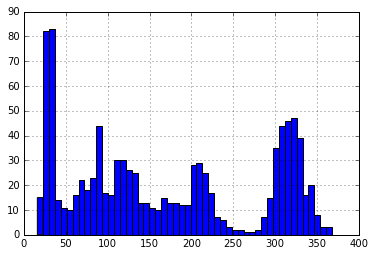

In [10]:
df['weight'].hist(bins=50)

# K-means

One among many clustering algorithms

In [32]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=6)

In [33]:
df[['weight']].head()

weight
0      69
1     200
2      79
3      27
4      41

In [34]:
km.fit(df[['weight']])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [35]:
df['prediction'] = km.predict(df[['weight']])

prediction
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
Name: weight, dtype: object

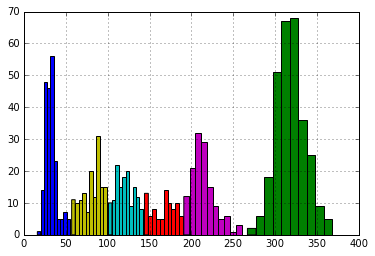

In [37]:
df.groupby('prediction')['weight'].hist(bins=10)

In [40]:
df = pd.read_csv("nba_2013_cleaned.csv")
df.head()

Name  Age           Team POS Number      Salary  Height  \
0         Gee, Alonzo   26      Cavaliers   F     33   3250000.0      78   
1     Wallace, Gerald   31        Celtics   F     45  10105855.0      79   
2        Williams, Mo   30  Trail Blazers   G     25   2652000.0      73   
3   Gladness, Mickell   27          Magic   C     40    762195.0      83   
4  Jefferson, Richard   33           Jazz   F     44  11046000.0      79   

   Weight  Years  1st Year         DOB       School               City  \
0     219      4      2009   5/29/1987      Alabama  Riviera Beach, FL   
1     220     12      2001   7/23/1982      Alabama      Sylacauga, AL   
2     195     10      2003  12/19/1982      Alabama        Jackson, MS   
3     220      2      2011   7/26/1986  Alabama A&M     Birmingham, AL   
4     230     12      2001   6/21/1980      Arizona    Los Angeles, CA   

  State/Province Country   Race HS Only  
0        Florida      US  Black      No  
1        Alabama      US  Black      No  
2    Mississippi      US  Black      No  
3        Alabama      US  Black      No  
4     California      US  Black      No

In [41]:
df = df[(df['POS'] == 'C') | (df['POS'] == 'F') | (df['POS'] == 'G')]

In [42]:
df['POS'].value_counts()

G    175
F    142
C     67
Name: POS, dtype: int64

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['POS_label'] = le.fit_transform(df['POS'])
df[['POS','POS_label']].head()

POS  POS_label
0   F          1
1   F          1
2   G          2
3   C          0
4   F          1

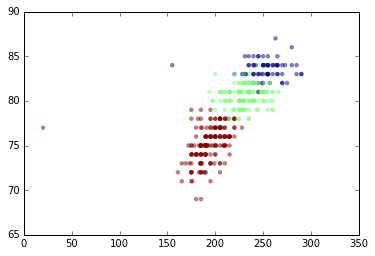

In [44]:
plt.scatter(df['Weight'], df['Height'], edgecolor='none', c=df['POS_label'], alpha=0.5)

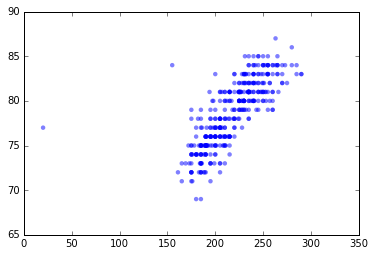

In [47]:
plt.scatter(df['Weight'], df['Height'], edgecolor='none', alpha=0.5)

# Order of features is important! keep the same between fit and predict

In [53]:
df[['Weight', 'Height']].head()

Weight  Height
0     219      78
1     220      79
2     195      73
3     220      83
4     230      79

In [57]:
df[['Height', 'Weight']].head()

Height  Weight
0      78     219
1      79     220
2      73     195
3      83     220
4      79     230

In [110]:
km = KMeans(n_clusters=4)
km.fit(df[['Weight', 'Height']])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [111]:
df['cluster_4'] = km.predict(df[['Weight', 'Height']])
df.head(2)

Name  Age       Team POS Number      Salary  Height  Weight  \
0      Gee, Alonzo   26  Cavaliers   F     33   3250000.0      78     219   
1  Wallace, Gerald   31    Celtics   F     45  10105855.0      79     220   

   Years  1st Year        DOB   School               City State/Province  \
0      4      2009  5/29/1987  Alabama  Riviera Beach, FL        Florida   
1     12      2001  7/23/1982  Alabama      Sylacauga, AL        Alabama   

  Country   Race HS Only  POS_label  cluster_4  
0      US  Black      No          1          0  
1      US  Black      No          1          0

## What's in each cluster? Do they seem like they were categorized somewhat correctly?

In [112]:
df.groupby('cluster_4')['POS'].value_counts()

cluster_4  POS
0          F      104
           G       30
           C       16
1          G      144
           F        9
           C        1
2          C       50
           F       29
3          G        1
Name: POS, dtype: int64

Not really... That's a lot of Guard/Forward/Centers together

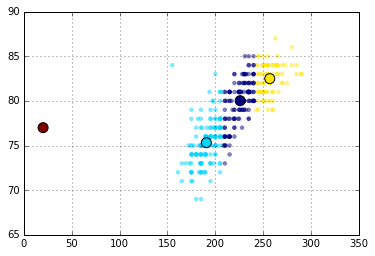

In [113]:
import numpy as np
plt.scatter(df['Weight'], df['Height'], edgecolor='none', c=df['cluster_4'], alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c=np.unique(km.labels_))
plt.grid()

# Oh no, k-means assumes all features are the same!! - 50 lb of weight is the same as 50" of height

Let's visualize that on a chart

(0, 350)

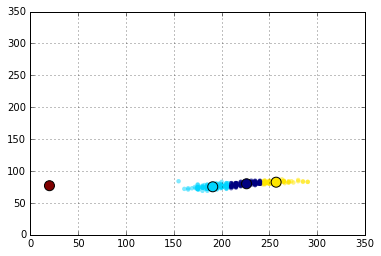

In [114]:
import numpy as np
plt.scatter(df['Weight'], df['Height'], edgecolor='none', c=df['cluster_4'], alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c=np.unique(km.labels_))
plt.grid()
plt.xlim([0,350])
plt.ylim([0,350])

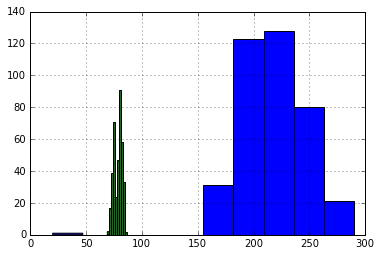

In [122]:
df['Weight'].hist()
df['Height'].hist()

In [123]:
from sklearn import preprocessing

In [124]:
preprocessing.scale(df['Height'])

/Users/soma/.virtualenvs/data/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([-0.17151614,  0.09952171, -1.52670541,  1.18367313,  0.09952171,
        0.09952171,  0.09952171,  0.37055957, -0.9846297 , -1.25566756,
       -0.9846297 ,  0.91263527, -0.442554  , -1.52670541, -1.52670541,
       -1.52670541,  0.64159742,  0.09952171,  1.18367313, -0.9846297 ,
       -0.9846297 ,  1.45471098,  0.64159742, -1.25566756, -0.9846297 ,
        0.91263527, -0.17151614,  0.37055957, -0.442554  ,  1.45471098,
        0.64159742,  0.09952171, -0.442554  ,  0.37055957, -1.25566756,
        0.91263527,  0.37055957, -0.17151614, -0.9846297 , -0.9846297 ,
        2.26782454,  0.91263527,  0.09952171,  0.09952171,  1.18367313,
        0.37055957, -1.52670541, -0.442554  , -1.25566756,  0.37055957,
       -0.9846297 ,  0.64159742, -1.52670541,  0.37055957, -0.9846297 ,
       -0.9846297 ,  1.72574884, -0.9846297 ,  0.64159742,  0.64159742,
        0.37055957,  1.18367313,  0.37055957, -0.17151614, -0.71359185,
       -0.71359185, -1.25566756, -1.25566756, -0.442554  ,  1.18

In [125]:
df['scaled_height'] = preprocessing.scale(df['Height'])
df['scaled_weight'] = preprocessing.scale(df['Weight'])

/Users/soma/.virtualenvs/data/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/soma/.virtualenvs/data/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


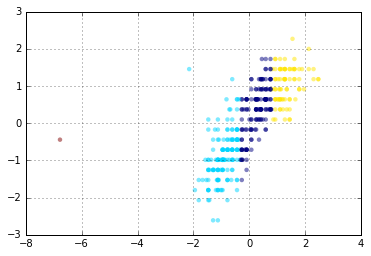

In [127]:
import numpy as np
plt.scatter(df['scaled_weight'], df['scaled_height'], edgecolor='none', c=df['cluster_4'], alpha=0.5)
plt.grid()

In [ ]:
# Make a new KMeans, 3 clusters
# fit it with the scaled weight and height
# predict it based on scaled weight and height
# store those labels into a new column
# graph it with the new labels

In [168]:
km = KMeans(n_clusters=5)
km.fit(df[['scaled_weight', 'scaled_height']])
df['scaled_prediction'] = km.predict(df[['scaled_weight', 'scaled_height']])
df['scaled_prediction'].value_counts()

2    110
4     99
0     92
1     82
3      1
Name: scaled_prediction, dtype: int64

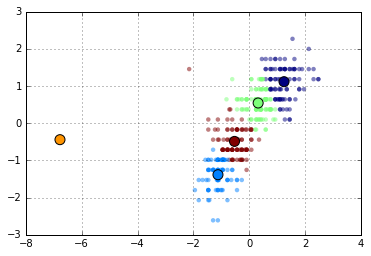

In [169]:
plt.scatter(df['scaled_weight'], df['scaled_height'], edgecolor='none', c=df['scaled_prediction'], alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c=np.unique(km.labels_))
plt.grid()

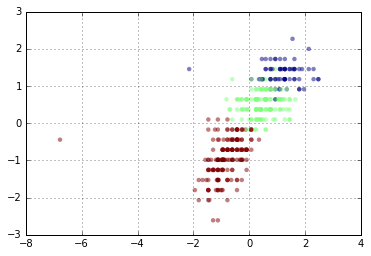

In [170]:
plt.scatter(df['scaled_weight'], df['scaled_height'], edgecolor='none', c=df['POS_label'], alpha=0.5)
plt.grid()

In [171]:
df.groupby('scaled_prediction')['POS'].value_counts()

scaled_prediction  POS
0                  C       61
                   F       31
1                  G       82
2                  F      105
                   C        5
3                  G        1
4                  G       92
                   F        6
                   C        1
Name: POS, dtype: int64

# Trying to use DBSCAN

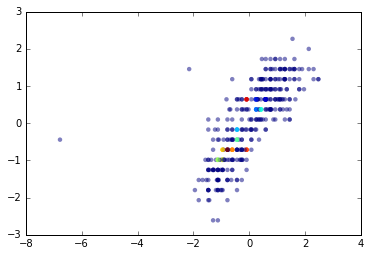

In [172]:
from sklearn.cluster import DBSCAN

db = DBSCAN()
df['db_category'] = db.fit_predict(df[["Height", "Weight"]])
plt.scatter(df['scaled_weight'], df['scaled_height'], edgecolor='none', c=df['db_category'], alpha=0.5)

In [165]:
# similarity measure between two clusterings by considering 
# all pairs of samples and counting pairs that are assigned
# in the same or different clusters in the predicted and true clusterings

from sklearn import metrics
metrics.adjusted_rand_score(df['POS_label'], df['scaled_prediction'])  

0.6837098610421475

In [166]:
# Mutual Information is a function that measures the agreement predicted plus actual
from sklearn import metrics
metrics.adjusted_mutual_info_score(df['POS_label'], df['scaled_prediction'])  


0.64644401811332386

In [163]:
# homogeneity: each cluster contains only members of a single class.

from sklearn import metrics
metrics.homogeneity_score(df['POS_label'], df['scaled_prediction'])  

0.67802428868913123

In [164]:
# completeness: all members of a given class are assigned to the same cluster.

from sklearn import metrics
metrics.completeness_score(df['POS_label'], df['scaled_prediction'])  

0.64816747653318207